## Project02_Titanic
**参考：**
1.    [kaggle](https://www.kaggle.com/c/titanic/data)
2.    [seaborn](https://seaborn.pydata.org/)
3.    [git](https://git-scm.com/book/zh/v2)
4.    [matplotlib](https://matplotlib.org/)
5.    [Free Statistics Calculators](http://www.danielsoper.com/statcalc/calculator.aspx?id=10)

### 1. 项目总览
数据集包含了泰坦尼克号于1912年4月15沉没时891名乘客的样本，其中所知信息有：
*    乘客ID
*    是否存活
*    船舱等级
*    姓名
*    性别
*    年龄
*    兄弟姐妹、配偶（差不多岁数）数量
*    父母、子女（上下各一个辈分）数量
*    船费
*    船舱号
*    登船港口


In [268]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style("darkgrid")

In [269]:
df = pd.read_csv(r'd:\下载\titanic-data.csv')

In [270]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


### 2. 数据清理
查看数据集时，发现年龄与船舱列有NaN值，先使用dropna进行筛选

In [271]:
new_df = df.dropna(subset=['Age', 'Cabin'])
new_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
21,22,1,2,"Beesley, Mr. Lawrence",male,34.0,0,0,248698,13.0000,D56,S
23,24,1,1,"Sloper, Mr. William Thompson",male,28.0,0,0,113788,35.5000,A6,S
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S
52,53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.0,1,0,PC 17572,76.7292,D33,C
54,55,0,1,"Ostby, Mr. Engelhart Cornelius",male,65.0,0,1,113509,61.9792,B30,C


### 3. 项目数据问题

#### 3.1 乘客相关单变量：
1.    乘客年龄分布
2.    乘客性别分布

#### 3.2 多变量
1.    乘客性别与是否生存的关系
2.    乘客所在船舱与是否生存的关系

### 4. 探索数据 

#### 4.1 乘客年龄分布

In [272]:
bins = np.arange(0, 90, 10)
df['Age_group'] = pd.cut(df['Age'], bins)
df.groupby(df['Age_group'])['PassengerId'].count()

Age_group
(0, 10]      64
(10, 20]    115
(20, 30]    230
(30, 40]    155
(40, 50]     86
(50, 60]     42
(60, 70]     17
(70, 80]      5
Name: PassengerId, dtype: int64

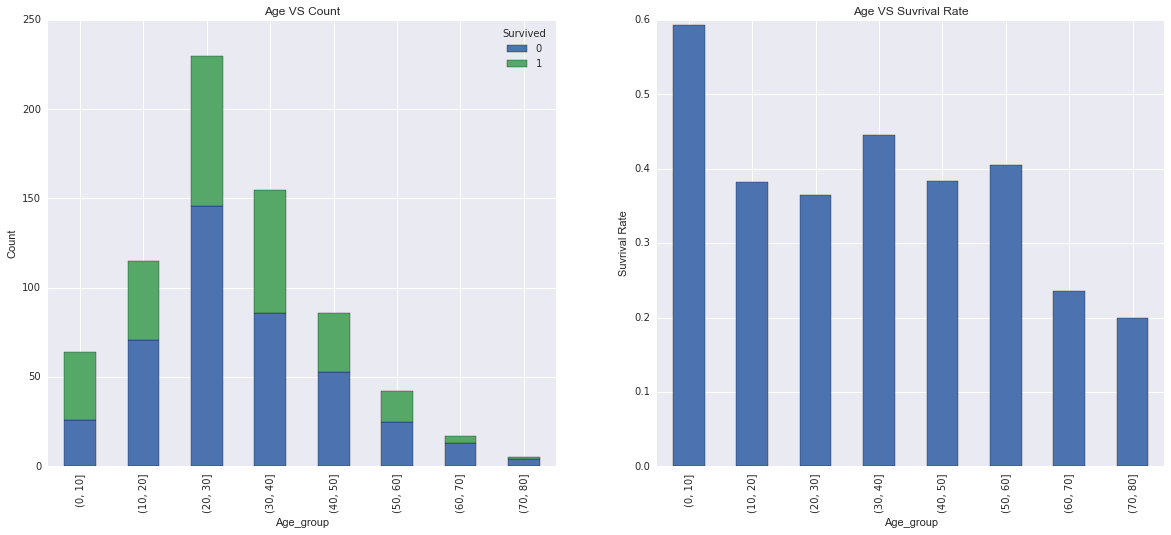

In [273]:
plt.figure(figsize=(12,5))
f, (ax1, ax2) = plt.subplots(1, 2)
f.set_size_inches((20, 8))
df.groupby(['Age_group', 'Survived'])['PassengerId'].count().unstack().plot(kind='bar',ax=ax1, stacked=True)
ax1.set_title('Age VS Count')
ax1.set_ylabel('Count')
df.groupby(['Age_group'])['Survived'].mean().plot(kind='bar',ax=ax2)
ax2.set_title('Age VS Suvrival Rate')
ax2.set_ylabel('Suvrival Rate')
plt.show()

根据图片可以看出，大部分乘客年龄集中在10岁及40岁之间，再看生存率一栏，10岁以下生存率最高

#### 4.2 乘客性别分布

In [274]:
sex_df = df[['Survived', 'Sex']].groupby('Sex').count().unstack()
sex_df

          Sex   
Survived  female    314
          male      577
dtype: int64

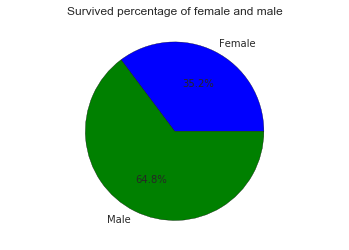

In [275]:
labels = ['Female', 'Male']
plt.axis('equal')
plt.pie(sex_df, labels=labels, autopct='%1.1f%%')
plt.title(u'Survived percentage of female and male')
plt.show()

男性乘客人数大大多于女性乘客人数，比例约为2：1

#### 4.3 男女生存比例

In [276]:
sex_cross_df = pd.crosstab(df['Sex'], df['Survived']) #形成性别与生存的交叉表
sex_cross_df.unstack()

Survived  Sex   
0         female     81
          male      468
1         female    233
          male      109
dtype: int64

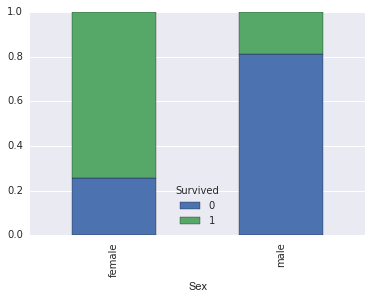

In [277]:
sex_cross_df.div(sex_cross_df.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)

虽然男性乘客人数大大多于女性乘客人数，但是女性幸存率却远高于男性，再根据之前年龄幸存比例图，推断出灾难发生时，采用了妇孺先行的准测

#### 4.4 船舱与生存比例

In [278]:
pclass_df = pd.crosstab(df['Pclass'], df['Survived'])
print(pclass_df)

Survived    0    1
Pclass            
1          80  136
2          97   87
3         372  119


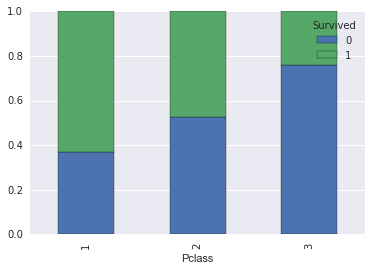

In [279]:
pclass_df.div(pclass_df.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)

一等舱生存率大于二等舱，二等舱大于三等舱，可能是由于一等舱所处的位置离救生船较近，具体原因不明，数据集中为未表明

### 5. 统计学推论

In [280]:
def df_summary(df, columnname):
    print('乘客平均生还率如下:\n%r'% (df['Survived'].groupby(df[columnname]).mean()))
    print('乘客总人数如下:\n%r'% (df['Survived'].groupby(df[columnname]).count()))
    print('乘客生还率标准偏差如下:\n%r'% (df['Survived'].groupby(df[columnname]).std()))
    print('乘客生还率方差如下:\n%r'% (df['Survived'].groupby(df[columnname]).var()))

In [281]:
df_summary(df, 'Sex')

乘客平均生还率如下:
Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64
乘客总人数如下:
Sex
female    314
male      577
Name: Survived, dtype: int64
乘客生还率标准偏差如下:
Sex
female    0.438211
male      0.391775
Name: Survived, dtype: float64
乘客生还率方差如下:
Sex
female    0.192029
male      0.153488
Name: Survived, dtype: float64


零假设:女性生存率不比男性高
$$H_0:\mu_f\leq\mu_m$$
备择假设:女性生存率高于男性
$$H_0:\mu_f>\mu_m$$
独立样本t检验，单尾正方向
$$\alpha=0.05,$$
描述统计量：
$$\overline{x}_f=0.74,n_f=314,df_f=313,SD_f=0.44,SS_f=0.19$$
$$\overline{x}_m=0.19,n_m=577,df_m=576,SD_m=0.39,SS_m=0.15$$
合并方差：
$$S_{p}^2=\frac{SS_f+SS_m}{df_f+df_m}=0.00038
$$
标准误差：
$$SE=\sqrt{\frac{S_{p}^2}{n_f}+\frac{S_{p}^2}{n_m}}=0.0014$$
t统计值：
$$t_statistic=\frac{\overline{x}_f-\overline{x}_m}{SE}=392.86$$
根据计算器计算t临界值:
$$t_{critical}=1.647$$
因此t统计值远大于t临界值，所以拒绝零假设，女性生还率显著高于男性


### 6.结论说明
1.    此份数据为总体的一部分样本，不能代表所有船员，推论有一定偏差
2.    部分数据缺失，导致部分统计结论误差加大
3.    本次调查属于观察性研究，不是实验研究